In [50]:
!pip install -q kaggle 

In [51]:
!mkdir ~/.kaggle 

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [52]:
!touch ~/.kaggle/kaggle.json

In [53]:
api_token = {"username":"kayodemajayi","key":"c44a0fdba748625a68d1498c88e2b975"}

In [54]:
import json 

with open('/root/.kaggle/kaggle.json','w') as file:
    json.dump(api_token,file)

In [55]:
!chmod 600 ~/.kaggle/kaggle.json

In [56]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia --force

100%|█████████████████████████████████████▉| 2.29G/2.29G [01:30<00:00, 28.6MB/s]
100%|██████████████████████████████████████| 2.29G/2.29G [01:30<00:00, 27.3MB/s]


In [57]:
import zipfile
with zipfile.ZipFile('./chest-xray-pneumonia.zip', 'r') as zip_ref:
    zip_ref.extractall('./data')

In [58]:
# set up function to go through files.
import glob
import random
import matplotlib.pyplot as plt


# Function to get random image. Assign n to normal and p to pnemonia
def get_random_image(dir,condition):
    placeholder=''
    if condition == 'n':
        placeholder='NORMAL'
    elif condition == 'p':
        placeholder='PNEUMONIA'
    else:
        raise Exception("Sorry, invalid condition")
    folder=f'./data/chest_xray/{dir}/{placeholder}/*.jpeg'
    img_paths=glob.glob(folder)
    max_length=len(img_paths)
    randomNumber=random.randint(0,max_length)
    for index, item in enumerate(img_paths, start=1):
        if index == randomNumber:
            print(index,item)
            image = plt.imread(item)
            readyImage=plt.imshow(image)
            return readyImage

In [59]:
get_random_image("val","n")

3 ./data/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg


In [60]:
# RGBA.. A is alpha and controls the opacity of the image
# All images should have 3 dimensions and be 224 by 224. 
from PIL import Image


image = Image.open('data/chest_xray/train/PNEUMONIA/person995_virus_1676.jpeg')  
print(image.format)
print(image.size)
print(image.mode)

JPEG
(1072, 720)
L


In [61]:
import PIL.Image

rgba_image=PIL.Image.open('data/chest_xray/train/PNEUMONIA/person843_bacteria_2763.jpeg')
rgb_image=rgba_image.convert('RGB')
print(rgb_image.mode)

# You need to loop over the image to convert to RGB

RGB


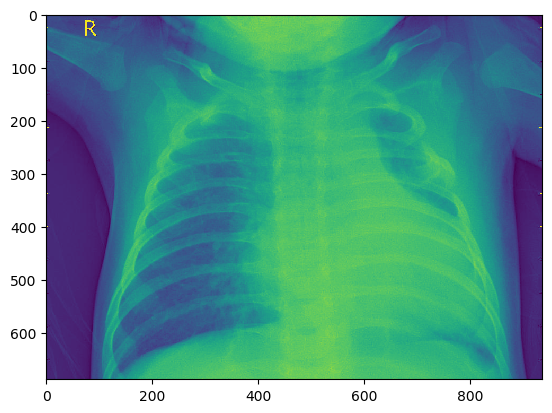

In [62]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img= mpimg.imread('data/chest_xray/train/PNEUMONIA/person843_bacteria_2763.jpeg')
imgplot=plt.imshow(img)
plt.show()
# The model shows the images as color even though they are grey scale. it needs to the converted. 

In [63]:
# Resize the images 
import glob
import matplotlib.pyplot as plt
from PIL import Image

# For the training dataset
folder=f'./data/chest_xray/train/*/*.jpeg'

counterPneu=0
counterNormal=0

img_paths=glob.glob(folder)

#cmap = grey in this case. If colored, ignore. 
for i in img_paths:
    if "person" in i:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/train' + '/train_pneumonia' + str(counterPneu)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterPneu+=1
    else:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/train' + '/train_normal' + str(counterNormal)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterNormal+=1
        

In [64]:
import glob
import matplotlib.pyplot as plt
from PIL import Image

# For the test dataset
folder=f'./data/chest_xray/test/*/*.jpeg'

counterPneu=0
counterNormal=0

img_paths=glob.glob(folder)

for i in img_paths:
    if "person" in i:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/test' + '/test_pneumonia' + str(counterPneu)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterPneu+=1
    else:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/test' + '/test_normal' + str(counterNormal)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterNormal+=1
        

In [65]:
import glob
import matplotlib.pyplot as plt
from PIL import Image

# For Validation folder
folder=f'./data/chest_xray/val/*/*.jpeg'

counterPneu=0
counterNormal=0

img_paths=glob.glob(folder)

for i in img_paths:
    if "person" in i:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/val' + '/val_pneumonia' + str(counterPneu)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterPneu+=1
    else:
        full_size_image=Image.open(i)
        im=full_size_image.resize((224,224))
        plt.imsave(fname='./data/chest_xray/val' + '/val_normal' + str(counterNormal)+'.jpeg',arr=im,format='jpeg',cmap='gray')
        counterNormal+=1

In [66]:
import glob
import pandas as pd

folder=f'./data/chest_xray/*/*.jpeg'

category=[]
filenames=[]
condition_of_lung=[]

all_files=glob.glob(folder)

for filename in all_files:
    if "train" in filename:
        if "pneumonia" in filename:
            category.append("train")
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
        elif "normal" in filename:
            category.append("train")
            filenames.append(filename)
            condition_of_lung.append("normal")
    elif "test" in filename:
        if "pneumonia" in filename:
            category.append("test")
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
        elif "normal" in filename:
            category.append("test")
            filenames.append(filename)
            condition_of_lung.append("normal")
    elif "val" in filename:
        if "pneumonia" in filename:
            category.append("val")
            filenames.append(filename)
            condition_of_lung.append("pneumonia")
        elif "normal" in filename:
            category.append("val")
            filenames.append(filename)
            condition_of_lung.append("normal")

all_data_df=pd.DataFrame({"dataset type":category,"x-ray result":condition_of_lung,"filename":filenames})

print(all_data_df.head())
            

  dataset type x-ray result                                       filename
0         test       normal       ./data/chest_xray/test/test_normal4.jpeg
1         test    pneumonia    ./data/chest_xray/test/test_pneumonia1.jpeg
2         test    pneumonia  ./data/chest_xray/test/test_pneumonia359.jpeg
3         test    pneumonia  ./data/chest_xray/test/test_pneumonia197.jpeg
4         test       normal     ./data/chest_xray/test/test_normal103.jpeg


In [67]:
# Run this cell to import or install the Data Wrangler widget to show automatic visualization and generate code to fix data quality issues

try:
    import sagemaker_datawrangler
except ImportError:
    !pip install --upgrade sagemaker-datawrangler
    import sagemaker_datawrangler

# Display Pandas DataFrame to view the widget: df, display(df), df.sample()... 

In [68]:
# Create Barchart for the dataframe
import seaborn as sns

g=sns.catplot(x="x-ray result",col="dataset type",kind="count",palette="ch:.55",data=all_data_df,legend=True)

for i in range(0,3):
    ax=g.facet_axis(0,i)
    for p in ax.patches:
        ax.text(p.get_x()+0.3,
        p.get_height()*1.05,
        '{0:.0f}'.format(p.get_height()),
        color='black',
        rotation='horizontal',
        size='large')

In [69]:
# As required by SageMaker, You need to create a .lst file for training and test set. 
#For multiclass ... 0-99 for 100 classes. 
# three sets of data
# Create classes for train folder
import glob
import pandas as pd
import os
train_folder='./data/chest_xray/train/*.jpeg'
train_df_lst=pd.DataFrame(columns=['labels','s3_path'],dtype=object)
train_imgs_path=glob.glob(train_folder)
counter=0
class_arg=''

for i in train_imgs_path:
    if "pneumonia" in i:
        class_arg=1
    else:
        class_arg=0
    train_df_lst.loc[counter]=[class_arg,os.path.basename(i)]
    counter+=1
print(train_df_lst.head())


  labels                   s3_path
0      0     train_normal1203.jpeg
1      1  train_pneumonia3349.jpeg
2      1   train_pneumonia478.jpeg
3      1  train_pneumonia1567.jpeg
4      1  train_pneumonia2296.jpeg


In [70]:
# Create classes for test folder
import glob
import pandas as pd
import os
test_folder='./data/chest_xray/test/*.jpeg'
test_df_lst=pd.DataFrame(columns=['labels','s3_path'],dtype=object)
test_imgs_path=glob.glob(test_folder)
counter=0
class_arg=''

for i in test_imgs_path:
    if "pneumonia" in i:
        class_arg=1
    else:
        class_arg=0
    test_df_lst.loc[counter]=[class_arg,os.path.basename(i)]
    counter+=1
print(test_df_lst.head())

  labels                 s3_path
0      0       test_normal4.jpeg
1      1    test_pneumonia1.jpeg
2      1  test_pneumonia359.jpeg
3      1  test_pneumonia197.jpeg
4      0     test_normal103.jpeg


In [71]:
# Convert the lst details to csv

def save_to_lst(df,prefix):
    return df[["labels","s3_path"]].to_csv(
    f"{prefix}.lst", sep='\t',index=True,header=False
    )

save_to_lst(train_df_lst.copy(),"train")
save_to_lst(test_df_lst.copy(),"test")

In [2]:
# S3 bucket for details

bucket='kayode-ml-sagemaker'
print("bucket:{}".format(bucket))
region='us-east-1'
print("region:{}".format(region))
roleArn='arn:aws:s3:::kayode-ml-sagemaker'
print("roleArn:{}".format(roleArn))

bucket:kayode-ml-sagemaker
region:us-east-1
roleArn:arn:aws:s3:::kayode-ml-sagemaker


In [73]:
import os

os.environ["DEFAULT_S3_BUCKET"]=bucket

In [ ]:
!aws s3 sync ./data/chest_xray/train s3://${DEFAULT_S3_BUCKET}/train/

In [6]:
!aws s3 sync ./data/chest_xray/test s3://${DEFAULT_S3_BUCKET}/test/

In [75]:
import boto3

boto3.Session().resource('s3').Bucket(bucket).Object("train.lst").upload_file('./train.lst')

In [89]:
boto3.Session().resource('s3').Bucket(bucket).Object("test.lst").upload_file('./test.lst')

In [90]:
# S3 bucket for details

# bucket='kayode-ml-sagemaker'
# print("bucket:{}".format(bucket))
# region='us-east-1'
# print("region:{}".format(region))
# roleArn='arn:aws:s3:::kayode-ml-sagemaker'
# print("roleArn:{}".format(roleArn))

In [6]:
# Set up sagemaker
import sagemaker
from sagemaker import image_uris
import boto3
from sagemaker import get_execution_role
sess=sagemaker.Session()

algorithm_image=image_uris.retrieve(
    region=boto3.Session().region_name,
    framework="image-classification"
)

s3_output_location=f"s3://{bucket}/models/image_model"
print(algorithm_image)

811284229777.dkr.ecr.us-east-1.amazonaws.com/image-classification:1


In [78]:
# Train the model in s3 using spot instances 
import time 
job_name_prefix="classifier"
timestamp=time.strftime("-%Y-%m-%d-%H-%M-%S",time.gmtime())
job_name=job_name_prefix+timestamp

# We will use spot for training
use_spot_instances = True
max_run = 432000 # in seconds
max_wait = 432000 if use_spot_instances else None # in seconds


checkpoint_s3_uri = None

if use_spot_instances:
    checkpoint_s3_uri = f's3://{bucket}/checkpoints/{job_name}'
    
print (f'Checkpoint uri: {checkpoint_s3_uri}')

Checkpoint uri: s3://kayode-ml-sagemaker/checkpoints/classifier-2023-07-13-13-49-22


In [79]:
role=get_execution_role()
print(role)

arn:aws:iam::244311666866:role/service-role/AmazonSageMaker-ExecutionRole-20230427T123905


In [80]:
import sagemaker
img_classifier_model=sagemaker.estimator.Estimator(
    algorithm_image,
    role=role,
    instance_count=1,
    instance_type="ml.p2.8xlarge",
    use_spot_instances=use_spot_instances,
    volume_size=50,
    max_run=432000,
    max_wait = 432000 ,
    input_mode="File",
    output_path=s3_output_location,
    sagemaker_session=sess
)
print(img_classifier_model)

In [81]:
# Count the number of files in the train folder. import glob 
import glob
count=0

for filepath in glob.glob('./data/chest_xray/train/*.jpeg'):
    count+=1
print(count)

5216


In [82]:
# Set hyperparamter details
img_classifier_model.set_hyperparameters(
image_shape='3,224,224',
num_classes=2,
use_pretrained_model=1,
num_training_samples=count,
augmentation_type='crop_color_transform',
epochs=15,
early_stopping=True,
early_stopping_min_epochs=8,
early_stopping_tolerance=0.0,
early_stopping_patience=5,
lr_scheduler_factor=0.1,
lr_scheduler_step='8,10,12')

In [83]:
#for hyperparameter tuning
# SGD --Stochastic gradient descent

from sagemaker.tuner import CategoricalParameter,ContinuousParameter,HyperparameterTuner

hyperparameter_ranges={
    "learning_rate":ContinuousParameter(0.01,0.1),
    "mini_batch_size":CategoricalParameter([8,16,32]),
    "optimizer":CategoricalParameter(["sgd","adam"])
}

In [84]:
objective_metric_name="validation:accuracy"
objective_type="Maximize"
max_jobs=4
max_parallel_jobs=1

In [85]:
tuner=HyperparameterTuner(estimator=img_classifier_model,
                         objective_metric_name=objective_metric_name,
                         hyperparameter_ranges=hyperparameter_ranges,
                         objective_type=objective_type,
                         max_jobs=max_jobs,
                         max_parallel_jobs=max_parallel_jobs  
                         )

In [86]:
from sagemaker.session import TrainingInput

model_inputs={
    "train":sagemaker.inputs.TrainingInput(s3_data=f"s3://{bucket}/train/",content_type="application/x-image"),
    "validation":sagemaker.inputs.TrainingInput(s3_data=f"s3://{bucket}/test/",content_type="application/x-image"),
    "train_lst":sagemaker.inputs.TrainingInput(s3_data=f"s3://{bucket}/train.lst",content_type="application/x-image"),
    "validation_lst":sagemaker.inputs.TrainingInput(s3_data=f"s3://{bucket}/test.lst",content_type="application/x-image"),
}

In [87]:
import time 
job_name_prefix="classifier"
timestamp=time.strftime("-%Y-%m-%d-%H-%M-%S",time.gmtime())
job_name=job_name_prefix+timestamp

In [ ]:
tuner.fit(inputs=model_inputs,job_name=job_name,logs=True)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [3]:
import sagemaker
from sagemaker import get_execution_role

In [4]:
role=get_execution_role()

In [7]:
model=sagemaker.model.Model(
image_uri=algorithm_image,
model_data='s3://kayode-ml-sagemaker/models/image_model/classifier-2023-07-13-13-50-36-001-656ae6f1/output/model.tar.gz',
role=role)
# Model data is s3 uri


In [9]:
endpoint_name= 'kay-image-classifier-pne1'

deployment = model.deploy(
initial_instance_count=1,
instance_type ='ml.m4.xlarge',
endpoint_name= endpoint_name)

-------------!

In [10]:
from sagemaker.predictor import Predictor
predictor = Predictor("kay-image-classifier-pne1")

In [11]:
from sagemaker.serializers import IdentitySerializer
import base64

file_name='data/chest_xray/val/val_pneumonia7.jpeg'

predictor.serializer= IdentitySerializer("image/jpeg")
with open(file_name,"rb")as f:
    payload=f.read()
    
inference=predictor.predict(data=payload)
print(inference)

b'[0.07550414651632309, 0.9244958162307739]'


In [19]:
# Deserialize the 

import glob
import json
import numpy as np
file_path = 'data/chest_xray/val/*.jpeg'
files=glob.glob(file_path)

y_true=[]
y_pred=[]

def make_pred():
    for file in files:
        if "normal" in file:
            with open(file,"rb") as f:
                payload=f.read()
                inference=predictor.predict(data=payload).decode('utf-8')
                result=json.loads(inference)
                predicted_class=np.argmax(result) # argmax returns the nearest index
                y_true.append(0)
                y_pred.append(predicted_class)
        elif "pneumonia" in file:
            with open(file, "rb") as f:
                payload=f.read()
                inference=predictor.predict(data=payload).decode("utf-8")
                result = json.loads(inference)
                y_true.append(1)
                y_pred.append(predicted_class)

make_pred()
print(y_true)
print(y_pred)

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0]
[1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]


In [21]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true,y_pred)

array([[4, 4],
       [3, 5]])

In [23]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           1       0.56      0.62      0.59         8

    accuracy                           0.56        16
   macro avg       0.56      0.56      0.56        16
weighted avg       0.56      0.56      0.56        16

